<a href="https://colab.research.google.com/github/ceydanurilhan/object-detection/blob/main/video_stream_object_detection_slow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

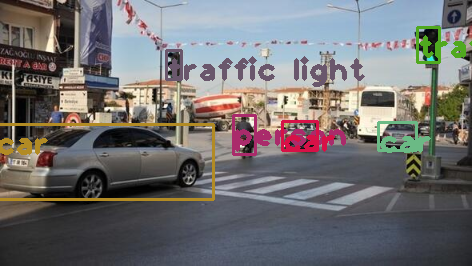

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#LOAD YOLO
net = cv2.dnn.readNet("yolov3.weights","yolov3.cfg")
classes = []
with open("coco.names","r") as f:
  classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0,255, size = (len(classes),3))

#LOADING IMAGE
img = cv2.imread("ckale.jpg") 
img = cv2.resize(img, None, fx=0.8, fy=0.8)
height, width, channels = img.shape

#DETECTING OBJECTS
blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop=False)


net.setInput(blob) 
outs = net.forward(output_layers)   

#SHOWING INFORMATIONS ON THE SCREEN
class_ids = []
confidences = [] 
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores [class_id]
    if confidence > 0.5:
       #object detected
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)

      #rectangle coordinates
      x = int(center_x - w / 2) 
      y = int(center_y - h / 2) 

      boxes.append([x,y,w,h,])
      confidences.append(float(confidence))
      class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0,4)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
  if i in indexes : 
    x,y,w,h = boxes[i]
    label = classes[class_ids[i]]
    color = colors[i]
    cv2.rectangle(img, (x,y), (x+w, y+h), color,2)
    cv2.putText(img,label,(x,y+30),font,2,color,3)


cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import time

#LOAD YOLO
net = cv2.dnn.readNet("yolov3.weights","yolov3.cfg")
classes = []
with open("coco.names","r") as f:
  classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0,255, size = (len(classes),3))

#LOADING IMAGE
cap = cv2.VideoCapture("street2.mp4")
font = cv2.FONT_HERSHEY_SIMPLEX
starting_time = time.time()
frame_id = 0
while True:
  _, frame = cap.read()
  frame_id += 1

  height, width, channels = frame.shape

  #DETECTING OBJECTS
  blob = cv2.dnn.blobFromImage(frame, 0.00392, (320,320), (0,0,0), True, crop=False)


  net.setInput(blob) 
  outs = net.forward(output_layers)   

  #SHOWING INFORMATIONS ON THE SCREEN
  class_ids = []
  confidences = [] 
  boxes = []
  for out in outs:
    for detection in out:
      scores = detection[5:]
      class_id = np.argmax(scores)
      confidence = scores [class_id]
      if confidence > 0.5:
        #object detected
        center_x = int(detection[0] * width)
        center_y = int(detection[1] * height)
        w = int(detection[2] * width)
        h = int(detection[3] * height)

        #rectangle coordinates
        x = int(center_x - w / 2) 
        y = int(center_y - h / 2) 

        boxes.append([x,y,w,h,])
        confidences.append(float(confidence))
        class_ids.append(class_id)

  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0,4)
  
  for i in range(len(boxes)):
    if i in indexes : 
      x,y,w,h = boxes[i]
      label = classes[class_ids[i]]
      color = colors[i]
      cv2.rectangle(frame, (x,y), (x+w, y+h), color,2)
      cv2.putText(frame,label,(x,y+30),font,1,color,3)


  elapsed_time = time.time() - starting_time
  fps = frame_id / elapsed_time
  cv2.putText(frame, "FPS:  " + str(fps), (10,30), font,1,(0,0,0),1)
  cv2_imshow(frame)
  key = cv2.waitKey(1)
  if key == 27:
    break

cap.release()    
cv2.destroyAllWindows()

AttributeError: ignored

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))